In [1]:
import pandas as pd

In [2]:
train_titanic=pd.read_csv("./titanic/train.csv")

In [3]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_titanic.shape

(891, 12)

In [5]:
train_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
median_age = train_titanic["Age"].median()

# Fill in missing values in the "Age" column with the median age
train_titanic["Age"].fillna(median_age, inplace=True)

In [8]:
train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# create a ew column for the cabin data

train_titanic["Has_Cabin"] = train_titanic["Cabin"].apply(lambda x: 0 if pd.isna(x) else 1)


In [10]:
train_titanic.drop("Cabin", axis=1, inplace=True)

In [11]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [12]:
#drop th columns which is not very beneficial


train_titanic.drop(["Name","PassengerId","Ticket"], axis=1, inplace=True)


In [13]:
train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [14]:
from sklearn.preprocessing import OneHotEncoder
# do on ehot encoding on embarked and sex columns
# Create a new DataFrame containing only the categorical columns you want to one-hot encode
categorical_df = train_titanic[["Sex", "Embarked"]]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the categorical data and transform it
categorical_encoded = encoder.fit_transform(categorical_df).toarray()

# Create a new DataFrame with the one-hot encoded features
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(input_features=categorical_df.columns))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
titanic_encoded_df = pd.concat([train_titanic, categorical_encoded_df], axis=1)

# Drop the original categorical columns
titanic_encoded_df.drop(["Sex", "Embarked"], axis=1, inplace=True)


In [15]:
titanic_encoded_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.0,1,0,7.2500,0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,1,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,1,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to standardize (e.g., age and fare)
selected_columns = ["Age", "Fare"]
data_to_scale = titanic_encoded_df[selected_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)

# Replace the original columns with the scaled columns
titanic_encoded_df[selected_columns] = scaled_df

In [17]:
titanic_encoded_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,-0.565736,1,0,-0.502445,0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,0.663861,1,0,0.786845,1,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,-0.258337,0,0,-0.488854,0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.433312,1,0,0.420730,1,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,0.433312,0,0,-0.486337,0,0.0,1.0,0.0,0.0,1.0,0.0


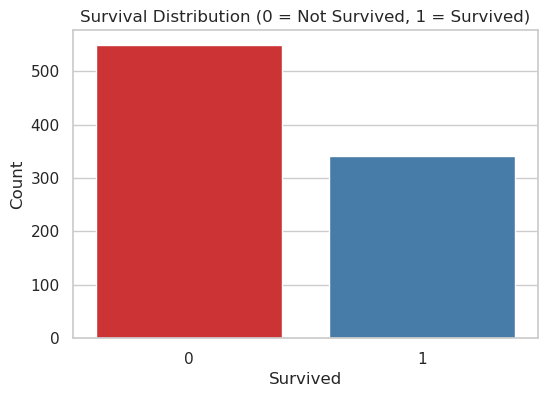

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for survival distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))  # Set the figure size

# Use Seaborn's countplot to create the bar chart
sns.countplot(x="Survived", data=titanic_encoded_df, palette="Set1")

# Add labels and title
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Distribution (0 = Not Survived, 1 = Survived)")

# Show the plot
plt.show()

In [19]:
# check if data is balanced or imbalanced

train_titanic["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
train_titanic["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
train_titanic["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

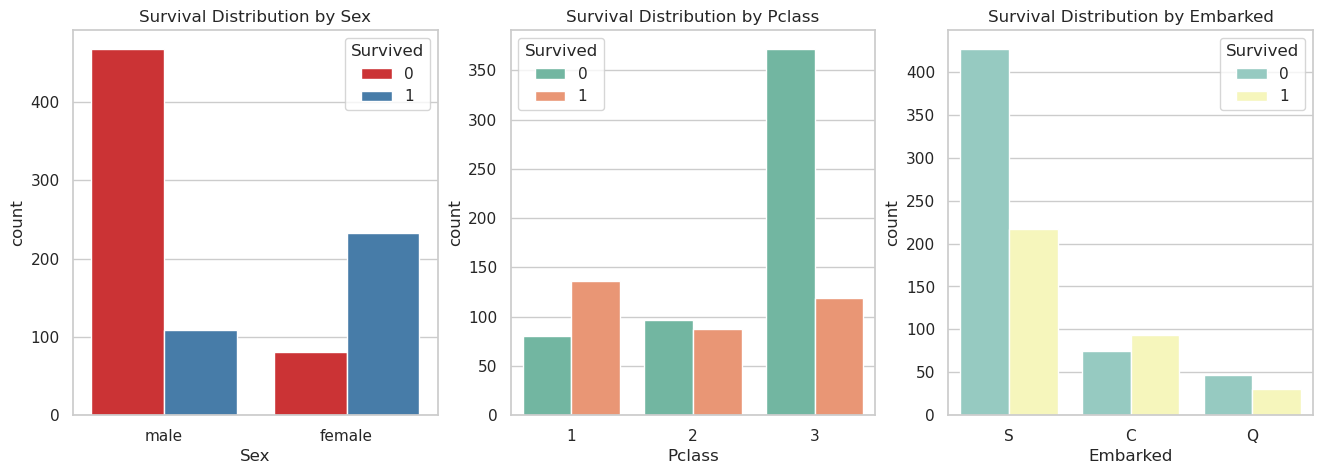

In [22]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create subplots for countplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Countplot for "Sex" vs. "Survived"
sns.countplot(x="Sex", hue="Survived", data=train_titanic, ax=axes[0], palette="Set1")
axes[0].set_title("Survival Distribution by Sex")

# Plot 2: Countplot for "Pclass" vs. "Survived"
sns.countplot(x="Pclass", hue="Survived", data=train_titanic, ax=axes[1], palette="Set2")
axes[1].set_title("Survival Distribution by Pclass")

# Plot 3: Countplot for "Embarked" vs. "Survived"
sns.countplot(x="Embarked", hue="Survived", data=train_titanic, ax=axes[2], palette="Set3")
axes[2].set_title("Survival Distribution by Embarked")

# Show the plots
plt.show()


1. Female has survived more as compared to male, so if in test data if there is female then her survival rate is high
2. people who have boarded titanic in lower class have died more.


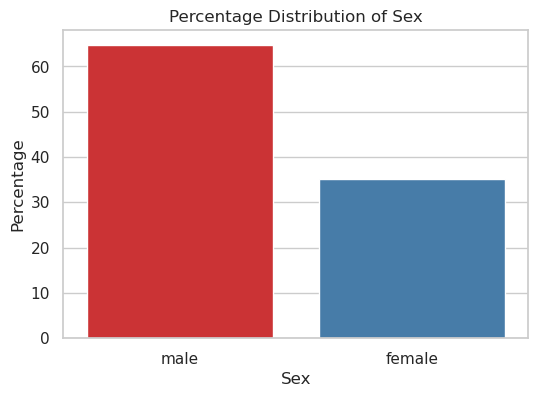

In [23]:
sex_percentages = train_titanic["Sex"].value_counts(normalize=True) * 100

# Create a bar chart for the percentage distribution of "Sex" against "Survived"
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Use Seaborn's barplot to create the bar chart
sns.barplot(x=sex_percentages.index, y=sex_percentages.values, palette="Set1")

# Add labels and title
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Sex")

# Show the plot
plt.show()


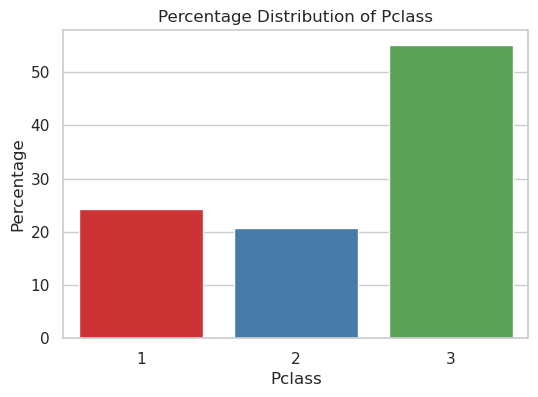

In [24]:
sex_percentages = train_titanic["Pclass"].value_counts(normalize=True) * 100

# Create a bar chart for the percentage distribution of "Sex" against "Survived"
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Use Seaborn's barplot to create the bar chart
sns.barplot(x=sex_percentages.index, y=sex_percentages.values, palette="Set1")

# Add labels and title
plt.xlabel("Pclass")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Pclass")

# Show the plot
plt.show()

In [25]:
train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


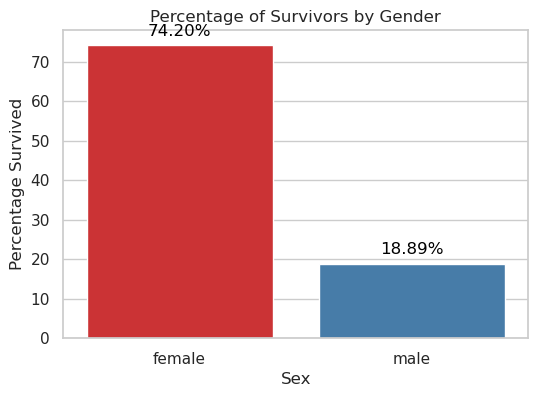

In [26]:
# Calculate the percentages of survival for each gender
survival_percentages = train_titanic.groupby("Sex")["Survived"].mean() * 100

# Create a bar chart for the percentage of survival by gender
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Use Seaborn's barplot to create the bar chart
ax=sns.barplot(x=survival_percentages.index, y=survival_percentages.values, palette="Set1")

# Add labels and title
plt.xlabel("Sex")
plt.ylabel("Percentage Survived")
plt.title("Percentage of Survivors by Gender")

# Add the actual percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


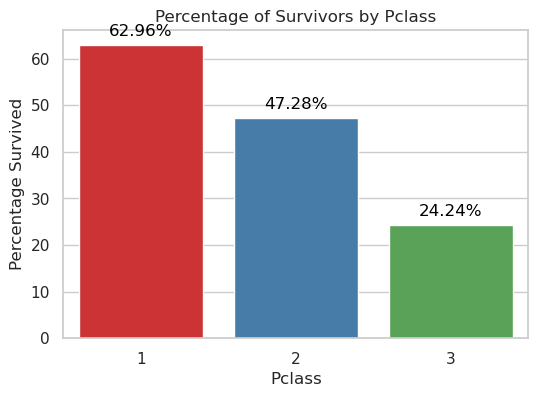

In [27]:
# Calculate the percentages of survival for each gender
survival_percentages = train_titanic.groupby("Pclass")["Survived"].mean() * 100
print(survival_percentages,train_titanic.groupby("Pclass")["Survived"].mean())
# Create a bar chart for the percentage of survival by gender
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Use Seaborn's barplot to create the bar chart
ax=sns.barplot(x=survival_percentages.index, y=survival_percentages.values, palette="Set1")

# Add labels and title
plt.xlabel("Pclass")
plt.ylabel("Percentage Survived")
plt.title("Percentage of Survivors by Pclass")

# Add the actual percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


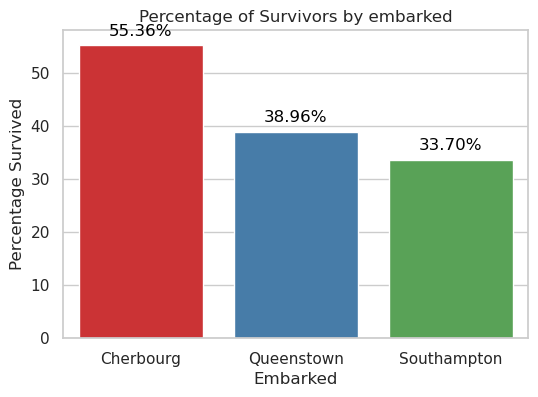

In [28]:
# Embarked

# Calculate the percentages of survival for each gender
survival_percentages = train_titanic.groupby("Embarked")["Survived"].mean() * 100
print(survival_percentages)

survival_percentages.index=["Cherbourg","Queenstown","Southampton"]
# Create a bar chart for the percentage of survival by gender
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Use Seaborn's barplot to create the bar chart
ax=sns.barplot(x=survival_percentages.index, y=survival_percentages.values, palette="Set1")

# Add labels and title
plt.xlabel("Embarked")
plt.ylabel("Percentage Survived")
plt.title("Percentage of Survivors by embarked")

# Add the actual percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

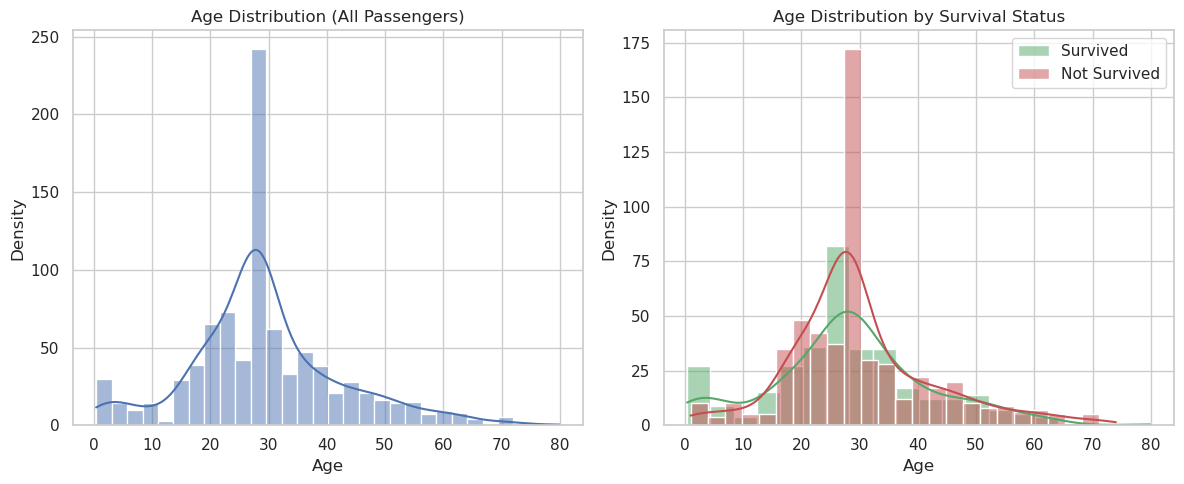

In [29]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Histogram of passenger ages for all passengers
sns.histplot(train_titanic["Age"], kde=True, ax=axes[0])
axes[0].set_title("Age Distribution (All Passengers)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")

# Plot 2: Histogram of passenger ages separated by survival status
sns.histplot(train_titanic[train_titanic["Survived"] == 1]["Age"], kde=True, label="Survived", color="g", ax=axes[1])
sns.histplot(train_titanic[train_titanic["Survived"] == 0]["Age"], kde=True, label="Not Survived", color="r", ax=axes[1])
axes[1].set_title("Age Distribution by Survival Status")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Density")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

0-10 AND 20-30 YEARS age people have survived more

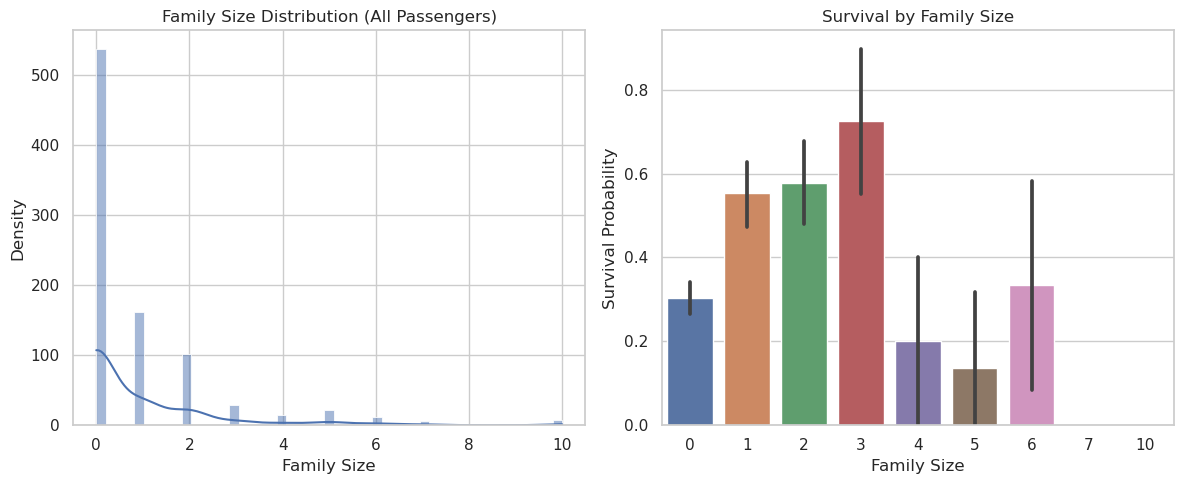

In [30]:
# Calculate family size by summing "SibSp" and "Parch" columns
train_titanic["FamilySize"] = train_titanic["SibSp"] + train_titanic["Parch"]

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Histogram of family size for all passengers
sns.histplot(train_titanic["FamilySize"], kde=True, ax=axes[0])
axes[0].set_title("Family Size Distribution (All Passengers)")
axes[0].set_xlabel("Family Size")
axes[0].set_ylabel("Density")

# Plot 2: Bar chart of survival by family size
sns.barplot(x="FamilySize", y="Survived", data=train_titanic, ax=axes[1])
axes[1].set_title("Survival by Family Size")
axes[1].set_xlabel("Family Size")
axes[1].set_ylabel("Survival Probability")

# Show the plots
plt.tight_layout()
plt.show()

family with more than 3 has more deaths

In [31]:
print(train_titanic.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Has_Cabin', 'FamilySize'],
      dtype='object')


In [32]:
print(titanic_encoded_df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan'],
      dtype='object')


In [33]:
titanic_encoded_df["FamilySize"]=train_titanic["FamilySize"]

In [34]:
from sklearn.feature_selection import SelectKBest, chi2
X = titanic_encoded_df.drop("Survived", axis=1)
y = titanic_encoded_df["Survived"]

In [35]:
# Create a SelectKBest instance with chi2 scoring
selector = SelectKBest(k=5)

In [36]:
X_train_new = selector.fit_transform(X ,y)


In [37]:
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a new DataFrame with only the selected features
titanic_df_reduced = titanic_encoded_df[selected_feature_names]

# Print the list of selected feature names
print("Selected Features:", selected_feature_names)



Selected Features: Index(['Pclass', 'Fare', 'Has_Cabin', 'Sex_female', 'Sex_male'], dtype='object')


In [38]:
titanic_df_reduced

,Pclass,Fare,Has_Cabin,Sex_female,Sex_male
0,3,-0.502445,0,0.0,1.0
1,1,0.786845,1,1.0,0.0
2,3,-0.488854,0,1.0,0.0
3,1,0.420730,1,1.0,0.0
4,3,-0.486337,0,0.0,1.0
...,...,...,...,...,...
886,2,-0.386671,0,0.0,1.0
887,1,-0.044381,1,1.0,0.0
888,3,-0.176263,0,1.0,0.0
889,1,-0.044381,1,0.0,1.0


In [39]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [40]:
print(titanic_df_reduced)

     Pclass      Fare  Has_Cabin  Sex_female  Sex_male
0         3 -0.502445          0         0.0       1.0
1         1  0.786845          1         1.0       0.0
2         3 -0.488854          0         1.0       0.0
3         1  0.420730          1         1.0       0.0
4         3 -0.486337          0         0.0       1.0
..      ...       ...        ...         ...       ...
886       2 -0.386671          0         0.0       1.0
887       1 -0.044381          1         1.0       0.0
888       3 -0.176263          0         1.0       0.0
889       1 -0.044381          1         0.0       1.0
890       3 -0.492378          0         0.0       1.0

[891 rows x 5 columns]


In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# Load and preprocess the Titanic dataset

# Define features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models with hyperparameters to search

# Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
models = [
    {
        "name":"Decision Tree",
        "model":DecisionTreeClassifier(),
        "params":dt_params
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'SVM',
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    }
]

best_model = None
best_accuracy = 0.0

for model_info in models:
    model = model_info['model']
    param_grid = model_info['params']
    
    # Perform hyperparameter tuning using Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    
    # Train the best model on the entire dataset
    best_model = model.set_params(**best_params)
    best_model.fit(X, y)
    
    # Evaluate the best model's performance on the testing set
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
    
    print(f"Best Hyperparameters for {model_info['name']}:", best_params)
    print(f"Test Accuracy of Best {model_info['name']} Model:", test_accuracy)
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_name = model_info['name']
    
print(f"The Best Model is {best_model_name} with Test Accuracy: {best_accuracy:.2f}")


Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test Accuracy of Best Decision Tree Model: 0.888268156424581
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy of Best Random Forest Model: 0.88268156424581
Best Hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy of Best SVM Model: 0.8156424581005587
Best Hyperparameters for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Test Accuracy of Best KNN Model: 0.8603351955307262
The Best Model is Decision Tree with Test Accuracy: 0.89


In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train the Decision Tree classifier on your dataset
clf.fit(X, y)



DecisionTreeClassifier()

In [46]:
df = pd.read_csv("./titanic/test.csv")


In [47]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
df.shape

(418, 11)

In [ ]:
# Now, you can use the trained classifier to make predictions
# For example, you can predict the class for a new set of features
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Replace with your own data
predicted_class = clf.predict(new_data)
print("Predicted Class:", predicted_class)

In [54]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
median_age = train_titanic["Age"].median()

# Fill in missing values in the "Age" column with the median age
df["Age"].fillna(median_age, inplace=True)

In [56]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S


In [58]:
df["Has_Cabin"] = df["Cabin"].apply(lambda x: 0 if pd.isna(x) else 1)

In [59]:
df.drop("Cabin", axis=1, inplace=True)

In [60]:
from sklearn.preprocessing import OneHotEncoder
# do on ehot encoding on embarked and sex columns
# Create a new DataFrame containing only the categorical columns you want to one-hot encode
categorical_df = df[["Sex", "Embarked"]]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the categorical data and transform it
categorical_encoded = encoder.fit_transform(categorical_df).toarray()

# Create a new DataFrame with the one-hot encoded features
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(input_features=categorical_df.columns))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
titanic_encoded_df = pd.concat([train_titanic, categorical_encoded_df], axis=1)

# Drop the original categorical columns
titanic_encoded_df.drop(["Sex", "Embarked"], axis=1, inplace=True)

In [61]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to standardize (e.g., age and fare)
selected_columns = ["Age", "Fare"]
data_to_scale = titanic_encoded_df[selected_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)

# Replace the original columns with the scaled columns
titanic_encoded_df[selected_columns] = scaled_df

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
titanic_encoded_df.shape

(891, 16)